In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('./train.csv')

/usr/lib/python2.7/dist-packages/pandas/io/parsers.py:1150: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
data['DateTime'] = pd.to_datetime(data['Date'])

In [4]:
data['Year'] = data['DateTime'].apply(lambda x: x.year)
data['Month'] = data['DateTime'].apply(lambda x: x.month)
data['Day'] = data['DateTime'].apply(lambda x: x.day)
data['WeekNumber'] = data['DateTime'].apply(lambda x: x.isocalendar()[1])

In [5]:
data.dtypes

Store                     int64
DayOfWeek                 int64
Date                     object
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
DateTime         datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
WeekNumber                int64
dtype: object

In [9]:
date_groups = data.groupby('WeekNumber')

In [10]:
date_groups['Sales'].mean()

WeekNumber
1             4339.044625
2             6354.031219
3             5111.601025
4             5595.613496
5             5463.895836
6             6504.228144
7             4871.796242
8             6198.905403
9             5015.960837
10            6576.679906
11            4830.652829
12            6299.949947
13            5457.882127
14            6084.850438
15            5223.314755
16            5934.788255
17            4932.028870
18            6234.087380
19            6080.324706
20            5292.308008
21            5632.738159
22            5331.294000
23            6591.302498
24            4870.437070
25            6370.223959
26            4973.631390
27            6957.622297
28            5106.326111
29            6565.515911
30            4842.166057
31            7380.832070
32            5639.805923
33            5740.043415
34            5430.695540
35            5871.070523
36            5633.349547
37            5795.051359
38            5273.759024
3

Populating the interactive namespace from numpy and matplotlib


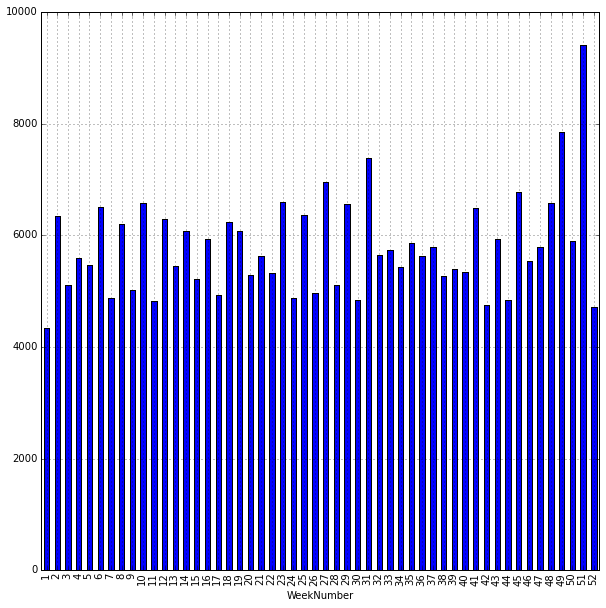

In [11]:
%pylab inline
date_groups['Sales'].mean().plot(figsize=(10,10), kind="bar")

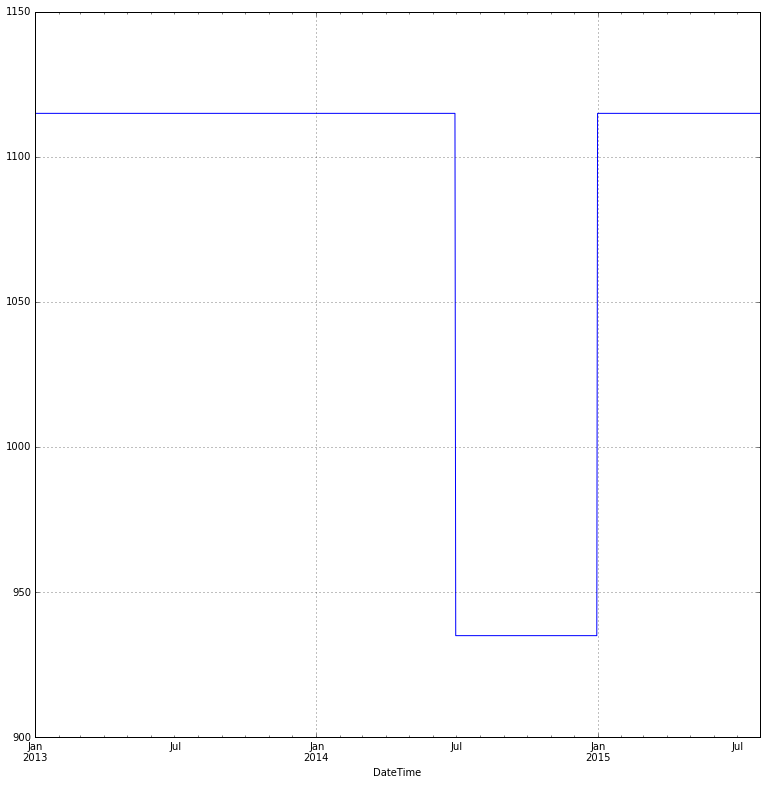

In [12]:
mask = (data['Open'] == 1)
grouped = data.groupby('DateTime')
grouped['Store'].count().plot(figsize=(13,13))

In [18]:
data[big_mask]['DateTime'].describe()

count                  105836
unique                    131
top       2013-09-27 00:00:00
freq                      934
first     2013-07-29 00:00:00
last      2015-07-31 00:00:00
Name: DateTime, dtype: object

In [17]:
data[big_mask]['Sales'].describe()

count    105836.000000
mean       6804.407054
std        3003.926185
min           0.000000
25%        4751.000000
50%        6260.000000
75%        8204.000000
max       33913.000000
Name: Sales, dtype: float64

In [20]:
data[data['Open'] == 0].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekNumber
count,172817.000000,172817.000000,172817,172817,172817,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000
mean,558.462987,6.333769,0,0,0,0.064716,0.105684,2013.834027,5.851768,15.053467,23.462645
std,322.771734,1.547688,0,0,0,0.246025,0.307434,0.778058,3.336661,9.252490,14.643610
min,1.000000,1.000000,0,0,0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000
25%,279.000000,7.000000,0,0,0,0.000000,0.000000,2013.000000,3.000000,7.000000,12.000000
50%,560.000000,7.000000,0,0,0,0.000000,0.000000,2014.000000,5.000000,15.000000,21.000000
75%,839.000000,7.000000,0,0,0,0.000000,0.000000,2014.000000,8.000000,23.000000,35.000000
max,1115.000000,7.000000,0,0,0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000


In [18]:
data.to_csv('postProcessed.csv', index=False)